## InstaBot Project Part 2

In [1]:
from selenium.webdriver.common.keys import Keys ## Provide keys in the keyboard like RETURN, F1, ALT
from selenium.webdriver.support.ui import Select ## To select the option html attribute
from selenium.webdriver.support.ui import WebDriverWait ## To use implcit and explicit wait
from selenium.webdriver.support import expected_conditions as EC ## Use in explicitly wait
from selenium.common.exceptions import NoSuchElementException ## To Handle NoSuchElementException
from selenium.webdriver.common.by import By ## To select the attribute by Class,link_text
from selenium import webdriver ## To import web Driver
import time ## To use in wait
from bs4 import BeautifulSoup ## Work with attribute 
import matplotlib.pyplot as plt ## To plot graphs
from datetime import date ## For Date In Question 1
import pandas as pd ## For Creating CSV File In Question2
import numpy as np ## For Creating CSV File In Question 2

In [2]:
driver = webdriver.Chrome(executable_path = 'Files\chromedriver') ## Creating Driver Object by Invoking ChromeDriver
driver.get('https://www.instagram.com/') ## Passing The Required Website Link
wait = WebDriverWait(driver, 10) ## Waiting for 10ms For The Contents of Website to Get Loaded

## 1) Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

## 1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [3]:
username = wait.until(EC.presence_of_element_located((By.NAME,'username'))) ## Searching For Username Input Box
username.send_keys('sampleusername') ## Passing The Username 
password = driver.find_element_by_name('password') ## Searching For Password Box
password.send_keys('samplepassword') ## Passing The Password 
login = driver.find_element_by_class_name('L3NKy') ## Searching For The Login Button
login.click() ## Clicking On The Login Button
close = wait.until(EC.presence_of_element_located((By.XPATH,'//div/button[contains(@class,"HoLwm")]'))) ## Searching for PopUp Exit Button 
close.click() ## Clicking On The Close Button 

In [4]:
a = wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]')))  ## Searching For Input Box
a.send_keys('food') ## Passing The Required Keys
time.sleep(3) ## Waiting For 3ms So That The Contents GEts Loaded 
handles = driver.find_elements_by_xpath('//div[@class = "fuqBx"]/a["href"]') ## Getting The List Of All The Handles After Searching FOr Foods 
food_list = [] ## Will Be Used To Append The UserNames
for i in handles:
    if 'explore' in i.get_attribute('href'): ## Ignoring If Explore Is In The href As It Will Either Be Location or Hashtag
        continue
    else:
        s = i.get_attribute('href').split('/') ## https://www.instagram.com/foodtalkindia
        if s[3] != 'food' and s[3] != 'foodytops': ## After Split s= ['https:','','www.instagram.com','foodtalkindia']
            food_list.append(s[3])             ## Appending The Username To Our List
a = wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]'))) ## Searching For The Input Box
a.clear() ## Clearing The Written In The Input Box
a = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteSearchClear'))) ## Clearing Search Box Using Class
a.click() ## Clicking On To Clear It
new_food_list = food_list[:10] ## Taking Only The Top 10 Handles
d = {} 
for ele in new_food_list: ## Iterating Over Each UserName Of Food List
    a = wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]'))) ## Searching For The Input Box  
    a.send_keys(ele) ## Passing The Required Username To Search Box
    first_search = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c'))) ## Searching For The First Profile 
    first_search.click() ## Clicking On The First Profile
    time.sleep(2) ## Waiting For 2ms So That The Page Contents Of The Page Gets Loaded
    followers_button = wait.until(EC.presence_of_element_located((By.XPATH,'//a[contains(@class,"-nal3")]'))) ## Getting The Followers Button
    followers_count = driver.find_elements_by_xpath('//a[contains(@class,"-nal3")]/span') ## Getting The Followers Count Button
    follow_count = followers_count[0].get_attribute('title') ## Extracting The Only Followers Count
    p = follow_count.split(",") ## Removing Comma (",") From The Number of Counts
    ccount = int("".join(p)) ## Joining The List Elements  
    d[ele] = ccount ## Adding  The Count In Dictionary And The Keys As Its Username Handle
    a = wait.until(EC.presence_of_element_located((By.XPATH,'//input[contains(@class,"XTCLo")]'))) ## Searching For The Search Box
    a.clear() ## Clearning The Search Box Inputs
c = 1 ## This Is To Get Only The Top 5 And The Break From The Loop
top_5_blog = [] ## Top 5 Blog List
max_follow = [] ## And There Followers Count
for i in sorted (d.items(), key = lambda kv: kv[1],reverse = True): ## Sorting The List In Descending Order 
    top_5_blog.append(i[0],) ## Adding In The List
    max_follow.append(i[1]) ## Adding In max_follow for As It Will Be Used Further
    print(i)               
    c = c + 1
    if c > 5: ## Checking If It Reached 5 or Not
        break ## exit From Loop If We ahve Top 5

('foodgod', 3599203)
('foodinsider', 2181739)
('dilsefoodie', 409515)
('foodtalkindia', 294246)
('food.darzee', 68832)


## 1.2) Now Find the number of posts these handles have done in the previous 3 days.

In [5]:
no_of_post = {} ## Dict With Keys As The Username Handle And Va;ues As Count Of No Of Post In Last 3 Days
for handle in top_5_blog: ## Iterating Over Eache Username Handle We Stored In Previous Question
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input') ## Searching For Input Box 
    search.send_keys(handle) ## Sending The Username Handel To Each Search Box
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c'))) ## Getting The First Profile
    first_search = driver.find_element_by_class_name('z556c') ## Getting The First Profile After Passing The Handel In The Search Box
    first_search.click() ## Clicking On The Fist Handle Got From Search box 
    count = 0 ## Keeping Is Count To Count The No Of Post In The Last 3 Days
    time.sleep(2) ## Waitng For The Page COntent To Load
    first_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_9AhH0"]'))).click() ## Clicking On The First Post Of The Searched Profile
    while True: ## Running Loop To Count All Post In Previous 3 Days
        details = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="_1o9PC Nzb55"]'))) ## Gettin The details Of Time
        t = details.get_attribute('datetime').split('T')[0].split('-') ## Getting (2020-04-27T19:40:34.000Z) Form Date Time Attribute So Spliting It With T And Only Extracting The Date
        mydate = date(int(t[0]),int(t[1]),int(t[2])) ## Converting The Date Received In The Date Object
        today = date.today() ## Getting Todays Date
        if (today - mydate).days < 4: ## Checking Wheather The Days Are Less Than 3 Or Not
            count = count + 1 ## If Less Than 3 Then Increasing The Value Of Count By 1
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))).click() ## Clicking On The Right Side Arrow Button To Go To The Next Post
        else:
            break ## As Soon As We Get Days More Than 4 We are Breaking Out Of The Loop. As All The Other Post Will Much Older
    no_of_post[handle] = count ## Stroing The Values Received (Count And The Username Handle) In The Dict
    close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]') ## Searching For The Close Button To Close The Post Page Section
    close.click() ## Clicking On The Button To Close The Post Section 
number_of_posts = [] ## No Of Posts List (Required FOr Next Question)
handles = [] ## Handle List (Required For next Question)
for i in no_of_post:
    handles.append(i) ## Apending The Username Which Was Stored As Keys To Handles List
    number_of_posts.append(no_of_post[i]) ## Appending The No Of Post (Which Was the Count Value In The Dict) To A List
    print(i,no_of_post[i])

foodgod 0
foodinsider 3
dilsefoodie 5
foodtalkindia 2
food.darzee 5


## 1.3) Depict this information using a suitable graph.

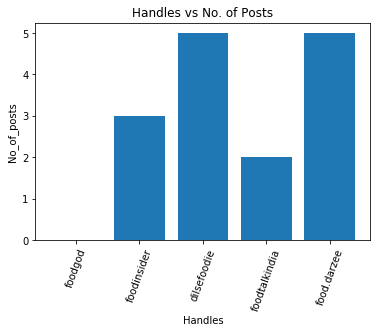

In [6]:
plt.bar(handles,number_of_posts) ## Handles And No Of Posts Received From The Previous Question
plt.xticks(rotation = 70)  
plt.xlabel('Handles') 
plt.ylabel('No_of_posts')
plt.title('Handles vs No. of Posts')
plt.show()

## 2) Your friend also needs a list of hashtags that he should use in his posts.

## 2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [7]:
top_5_handles = {} ## Dict For Storing Post Scrape Details (Keys will be Username ANd Its Values Will Be A List With Its Values As First 10 Post Details)
for handle in top_5_blog: ## Iterating Over Eache Username Handle We Stored In Previous Question
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input') ## Searching For The Input box
    search.send_keys(handle) ## Passing The Handle In The Search Box
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c'))) ## Getting The First Profile
    first_search = driver.find_element_by_class_name('z556c') ## Getting the First profile
    first_search.click() ## Clicking On The First Profile
    first_10_post = [] ## Stroing The Details Of First 10 Post 
    time.sleep(2) ## Waiting For The Content Of The Paeg To Get Loaded
    first_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_9AhH0"]'))).click() ## Clicking On The First Post Of The Searched Profile 
    i = 1 ## Keeping The Count As We Only Need The Deatils Of The 10 Posts 
    while i < 11:
        details = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="C4VMK"]/span'))).text ## Getting The First Writting On The Captions
        first_10_post.append(details) ## Appending The Text Received To The List
        next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))).click() ## Clicking On The Right Side Arrow Button To Go To The Next Post
        i = i + 1 ## Increasing The Count As we only Need 10 Post
    top_5_handles[handle] = first_10_post ## Adding The Information To The Dict Keys as Username And Value As List Conataning Details Of First 10 Posts
    close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]') ## Searching For The Close Button To Close The Post Page Section
    close.click() ## Clicking On The Button To Close The Post Section  
for i in top_5_handles: ## Printing The Post Deatils For Each Handle
    print(i) ## Printing The Handle Name
    print("------------------------------") 
    l = top_5_handles[i] ## Storing The Value Of The Handle i.e To A List 
    j = 0 
    k = 1 ## Using This To Number The Post While Printing
    while j < 10:
        print("***** Post " + str(k) + "*****") ## Printing THe Post With Its Corresponding Number
        print(l[j])
        k = k + 1
        j = j + 1              

foodgod
------------------------------
***** Post 1*****
Should this be a dark, milk, or white chocolate pool??⁣
⁣
📹@mrhalawa
***** Post 2*****
Savory or sweet??⁣⁣
📹 @umihito.vlog
***** Post 3*****
I accepted the #ALLINCHALLENGE and I’m giving away $10,000 in food 🍔

Click the link in my Bio to enter. I hereby challenge @lala @fatjoe to join us in going ALL IN for those in need!! @allinchallenge
***** Post 4*****
I built my own gym w/ @vodkabeluga .. who wants one?

watch till ending... a surprise🚲🌙
***** Post 5*****
It was an honor and pleasure to give back to the amazing nurses and doctors of @mountsinaimedicalcenter and @umiamihealth, thank you for everything you’re doing for Miami 🙏🏼 also a special thanks to @adameljamal1 for helping to make all this happen!!
***** Post 6*****
Comment 🍓 for the UK 🇬🇧 to get better quickly!! Can’t wait to visit soon!
***** Post 7*****
You are so amazing and your feed is literally goals
***** Post 8*****
I made something out of nothing!!

Use #foodgo

## 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word

In [8]:
totalFreq = {} ## Dict To Calculate The Frequency of Each Hashtags Present in The Content That Has Been Scrapeed From The Last Question
all_words = [] ## List To Store All The Words 
for i in top_5_handles: ## Iterating Through The Dict
    l = top_5_handles[i] ## Fetching The Value Of Each Key
    for j in l: ## Iterating Throug Each List (The Values Are The Contents Of First 10 Posts Of Each Handles)
        string = j.split() ## Spliting Each String Which Is Contents Of each Single Post With Spaces
        for k in string: ## Now Iterating Over Each Words In The Lsit Created By Spliting
            if k[0] == '#': ## Checking If The First Character Of Words Begin With Hashtags
                val = k[1:] ## If Above Condition True Then Fetching The Words Removing The Hashtags
                all_words.append(val) ## Appending The Data To The List Of All Words
                if val in totalFreq: ## Now Adding All Th Words To Dict 
                    totalFreq[val] = totalFreq[val] + 1
                else:
                    totalFreq[val] = 1
        
print(totalFreq) ## Dict Keys As The Words And Values As Its Frequency
print()
print(all_words)

{'ALLINCHALLENGE': 1, 'foodgod': 1, 'robocams': 1, 'musicvideo': 1, 'music': 1, 'video': 1, 'FoodInsider': 8, 'tavern': 1, 'pub': 1, 'Irishpub': 1, 'Irish': 1, 'Denver': 1, 'travel': 1, 'food': 5, 'iconicfoods': 1, 'bacon': 1, 'barbacon': 1, 'nyc': 1, 'nycfoodies': 1, 'baking': 1, 'breadmaking': 1, 'beer': 1, 'brewery': 1, 'US': 1, 'Harlem': 1, 'pizza': 2, 'pepperoni': 1, 'NYC': 1, 'macncheese': 1, 'cheese': 2, 'cooking': 2, 'pepperonipizza': 1, 'bestintown': 1, 'nyeats': 1, 'parmesan': 1, 'parmesancheese': 1, 'Italy': 1, 'dilsefoodie': 10, 'egg': 1, 'scrambledeggs': 1, 'easycookingwithdilsefoodie': 2, 'poorichole': 1, 'missyou': 1, 'restinpeace': 1, 'bollywood': 1, 'actor': 1, 'Maggi': 1, 'nagpur': 1, 'PalakPaneer': 1, 'CholeKulche': 1, 'nagpurfood': 1, 'QuaranTipple': 1, 'TalkDrinks': 1, 'HomeBar': 1, 'Qauarantipples': 1, 'Stayhome': 1, 'StayFit!': 1, 'happycustomer': 2, 'fooddarzee': 7, 'bakeddarzee': 3, 'healthymeals': 2, 'recipes': 1, 'foodporn': 1, 'recipe': 2, 'yummy': 1, 'healt

## 2.3) Create a csv file with two columns : the word and its frequency

In [9]:
lili = [] ## Creating A 2D List
for i in totalFreq: ## Iterating Over The Dict
    s = [] 
    s.append(i) ## Appending The Key To The List (Ex ['ALLINCHALLENGE'])
    s.append(totalFreq[i]) ## Appending The Value of Key To The Same List (Ex ['ALLINCHALLENGE',1])
    lili.append(s) ## Appending The List In Another List Hence Creating A 2D List (Ex [['ALLINCHALLENGE',1]])
final_data=np.array(lili) ## Converting The 2D List Into Numpy Array
dataset = pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]}) ## Converting The Numpy Into PAndas DataFrame With Coloum Name
dataset.to_csv('Frequency.csv',index=False) ## Converting The DataFrame To CSV File 
print(dataset)

                   Word Frequency
0        ALLINCHALLENGE         1
1               foodgod         1
2              robocams         1
3            musicvideo         1
4                 music         1
..                  ...       ...
155        ketobrownies         1
156    sugarfreedessert         1
157  mumbaifoodbloggers         1
158      healthypopcorn         1
159            styyhome         1

[160 rows x 2 columns]


## 2.4) Now, find the hashtags that were most popular among these bloggers

In [10]:
t = 1 ## Keeping A Count As We Need Popular Hashtgas That Is Hashtags With Maximum Frequency
top_5_hash = [] ## Hashtags
top_5_times = [] ## And Its Counts
for i in sorted (totalFreq.items(), key = lambda kv: kv[1],reverse=True): ## Sorting In Desending Order
    top_5_hash.append(i[0]) ## Appending The Words
    top_5_times.append(i[1]) ## Appending Its COunts
    print(i)
    t = t + 1 ## Increaing As We Need Only 5
    if t>5: ## Cheaking Wheather Reached 5 Hashtags Or Not
        break

('dilsefoodie', 10)
('staysafe', 10)
('FoodInsider', 8)
('stayhome', 8)
('fooddarzee', 7)


## 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

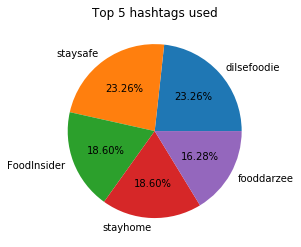

In [11]:
plt.pie(top_5_times,labels = top_5_hash,autopct = "%.2f%%") ## Ploting The Pie Chart Of Top 5 Hashtags
plt.title("Top 5 hashtags used")
plt.show()

## 3)You need to also calculate average followers : likes ratio for the obtained handles.Followers : Likes ratio is calculated as follows:

## 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [12]:
top_10_post_like = {} ## Dict To Store The Required Information Keys As Handle And Its Values As List Of Likes In The First 10 Posts
for handle in top_5_blog: ## Iterating Through The UserNmae Handle List 
    search = driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input') ## Searching For The Input box         
    search.send_keys(handle) ## Passing The Handle In The Search Box
    b = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'z556c'))) ## Getting The First Profile
    first_search = driver.find_element_by_class_name('z556c') ## Getting The First Profile         
    first_search.click() ## Clicking On The First Profile
    post_likes = [] ## To Store The Likes Of First 10 Posts for Each Handle
    time.sleep(2) ## Waiting For The Content Of The Paeg To Get Loaded
    first_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_9AhH0"]'))).click() ## Clicking On The First Post Of The Searched Profile 
    i = 1 ## Keeping The Count As We Only Need The Likes Of The 10 Posts         
    while i < 11:
        details = wait.until(EC.presence_of_element_located((By.XPATH,'//section[@class="EDfFK ygqzn"]'))) ## Getting The Section Which Contains The Likes Or Views Count
        try: ## Using Try Block Because For Videos (Views) And Post (Likes) The Class Are DIfferent
            non_video = details.find_element_by_xpath('.//div[@class ="Nm9Fw"]') ## Fetching The Details Of Posts
            li = non_video.find_elements_by_xpath('.//a') ## Getting The List Of All The a Tags Because If Somewhone Has Like The Post The We Get The Name Of That Person
            likes = non_video.find_element_by_xpath('.//span').text ## Getting The Count 
            num = int(likes.replace(',','')) ## Converting The Count Into Numbers And Replacimg The Commas 
            total = num + len(li) ## Taking Out The Total Count 
            post_likes.append(total) ## APpending It To The List
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))).click() ## Clicking On The Right Side Arrow Button To Go To The Next Post
            i = i + 1 ## Increasing The Count As We Need Only 10
        except NoSuchElementException: ## This Will Work If The Post Is A Video And Not A Picture
            views = details.find_element_by_xpath('.//span[@class = "vcOH2"]/span').text ## Getting The Details Of The Video
            num = int(views.replace(',','')) ## In Video There Are Only Views And So Converting To Number And Replacing Commas
            post_likes.append(num) ## Adding The Count To List
            next_btn = wait.until(EC.element_to_be_clickable((By.CLASS_NAME,'coreSpriteRightPaginationArrow'))).click() ## Clicking On The Right Side Arrow Button To Go To The Next Post
            i = i + 1 ## Increasing The Count As We Need Only 10
    top_10_post_like[handle] = post_likes ## Stroring The Value In Dict
    close = driver.find_element_by_xpath('//div[@class="                   Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]') ## Searching For The Close Button To Close The Post Page Section
    close.click() ## Clicking On The Button To Close The Post Section  
for i in top_10_post_like:
    print(i,top_10_post_like[i])

foodgod [670718, 64274, 283040, 406693, 154995, 978839, 1084993, 527478, 963815, 408248]
foodinsider [71269, 171633, 437459, 357161, 7916, 107390, 176274, 220512, 65878, 206692]
dilsefoodie [90979, 8465, 114641, 13041, 90097, 40274, 324798, 89271, 78794, 13855]
foodtalkindia [3127, 2413, 4538, 1424, 15134, 1768, 3038, 760, 928, 1553]
food.darzee [60, 391, 600, 109, 162, 223, 25910, 330, 161, 376]


## 3.2) Calculate the average likes for a handle

In [13]:
average_likes = {} ## Dict to Store Average Like of 10 Post For Each Handle
for i in top_10_post_like: ## Iterating Throuhg The Dict Obtained In Last Question
    l = top_10_post_like[i] ## Taking Out The Value Of Key In A List
    total = sum(l) ## Calcuating Its Sum
    average = total/len(l) ## Calculating The Average
    average_likes[i] = average ## Adding The Deatils To The Dict 
for i in average_likes:
    print(i,average_likes[i])

foodgod 554309.3
foodinsider 182218.4
dilsefoodie 86421.5
foodtalkindia 3468.3
food.darzee 2832.2


## 3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [14]:
print(average_likes) ## Obtained In Previous Questions Printing Just To Check 
print(top_5_blog) ## Obtained In Previous Question Printing Just To Check
print(max_follow) ## Obtained In Previous Question Printing Just To Check
print() 
print("***************************************")
i = 0
avg_follower = []
for key in average_likes: ## 
    avg = average_likes[key]/max_follow[i] ## Followers By Average Like Ratio
    avg_follower.append(avg) ## Appending The Avg To A List Required In Later Question
    print(key,avg) 
    i = i + 1

{'foodgod': 554309.3, 'foodinsider': 182218.4, 'dilsefoodie': 86421.5, 'foodtalkindia': 3468.3, 'food.darzee': 2832.2}
['foodgod', 'foodinsider', 'dilsefoodie', 'foodtalkindia', 'food.darzee']
[3599203, 2181739, 409515, 294246, 68832]

***************************************
foodgod 0.15400890141511886
foodinsider 0.08351979773932629
dilsefoodie 0.21103378386628086
foodtalkindia 0.01178707611998124
food.darzee 0.041146559739655975


## 3.4) Create a bar graph to depict the above obtained information.

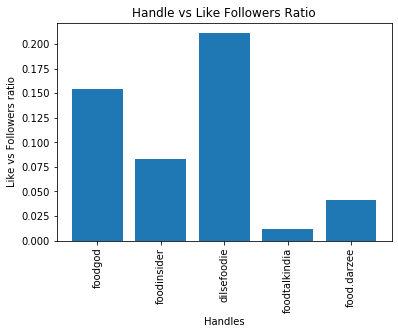

In [15]:
plt.bar(top_5_blog,avg_follower) ## Deatils Obtains In Previous Question. Just Showing The Graph.
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()